In [73]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [74]:
# creating a conenction to the database
conn = sqlite3.connect('reddit-posts.db')
print(conn.total_changes)

0


In [75]:
#converting data into a pandas dataframe
airlines.head()

,id,title,body,score,author,data,url,sentiment
0,12cjf5q,I flew Norse into JFK and they let us off the ...,We got off at terminal 7 and instead of going ...,302,tiktokbrowser,1.680699e+09,https://i.redd.it/op7j6oert3sa1.jpg,negative
1,133bh0h,Frontier Baggage Scam,Literally saw something I have never seen in a...,168,kniedrist,1.682815e+09,None,negative
2,10bx7c4,Small Claims Court is Great for Air Travel Dis...,"Hi everyone, recently I flew Turkish to Ethiop...",140,[deleted],1.673725e+09,None,negative
3,ob9f9b,Try to be patient &amp; kind,Not sure if this should be posted here. I’m a ...,132,verygreenmachine,1.625096e+09,None,negative
4,100lm4d,Adult Diaper Changed in JAL Business Class,As the title states. I am currently on JL062 N...,116,sveddevs,1.672586e+09,None,negative


In [76]:
#totalling the sentiment analysis results
sent_summary = airlines['sentiment'].value_counts()
sent_summary

neutral     313
negative    296
positive     48
Name: sentiment, dtype: int64

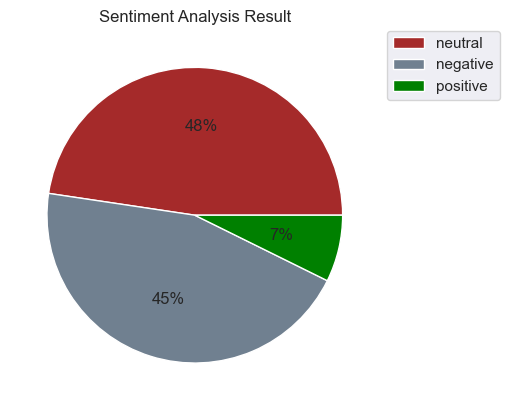

In [77]:
#compiling the results into a pie chart
colors = ['brown', 'slategray', 'green']
ax = sent_summary.plot(kind='pie', y='score',autopct='%1.0f%%', 
                       colors = colors, ylabel='', labeldistance=None)
ax.set_title('Sentiment Analysis Result')
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

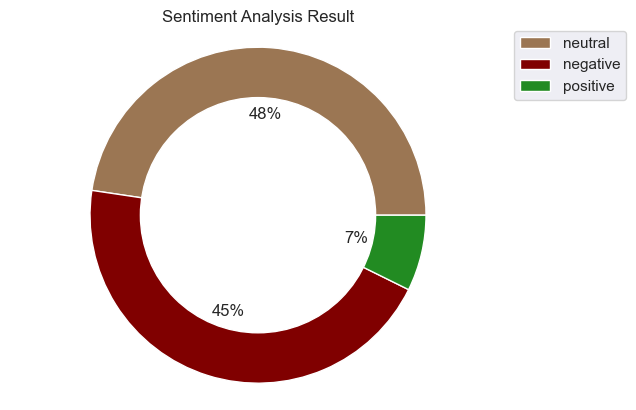

In [78]:
import matplotlib.pyplot as plt

# Compiling the results into a pie chart
colors = ['#9b7653', '#800000', '#228B22']  # Custom colors for the pie slices

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the pie chart
sent_summary.plot(kind='pie', y='score', autopct='%1.0f%%',
                  colors=colors, ylabel='', labeldistance=None,
                  ax=ax, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Set the title and legend
ax.set_title('Sentiment Analysis Result')
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

# Add a white circle at the center to create a donut-like appearance
center_circle = plt.Circle((0, 0), 0.7, fc='white')
ax.add_patch(center_circle)

# Set the aspect ratio to be equal to make the pie chart circular
ax.axis('equal')

# Remove unnecessary spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', length=0)

plt.show()


## Performing LDA

In [79]:
# Initialize regex tokenizer
#tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,2))

#                        tokenizer = tokenizer.tokenize)

# Changing series to list and replacing NaN with empty strings
air_list = airlines['body'].fillna('').to_list()

# Fit and Transform the documents
train_data = tfidf.fit_transform(air_list) 

In [83]:
# Define the number of topics or components
num_components=6

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
lda_matrix = model.fit_transform(train_data)

# Get Components 
lda_components=model.components_

In [84]:
# Print the topics with their terms
feature_names = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(feature_names, component)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:7]
    top_terms_list = [term for term, _ in top_terms_key] 
    print("Topic " + str(index) + ": ", top_terms_list)

Topic 0:  ['flight', 'just', 'flights', 'hours', 'airlines', 'amp', 'know']
Topic 1:  ['flight', 'time', 'flights', 'airport', 'booked', 'gt', 'travel']
Topic 2:  ['flight', 'flights', 'airline', 'time', 'refund', 'travel', 'just']
Topic 3:  ['flight', 'air', 'seat', 'flights', 'seats', 'just', 'france']
Topic 4:  ['flight', 'refund', 'just', 'time', 'tickets', 'ticket', 'bag']
Topic 5:  ['flight', 'just', 'flights', 'hours', 'airline', 'ticket', 'test']


In [82]:
conn.close()